In [1]:
import pandas as pd
import numpy as np
import requests
import json
from yelp.client import Client
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
#You have to use your API key to access the data!

MY_API_KEY = "jwXHlrnwO1ThtW84vByrO-KE5AMLYobn6ZLsZp5fNQSUuFaHtrK6mVlTI2Qte7HMqb045-I1415PkJwGsaVwgkwhxywzDn48rhJ5etSwP8jywxjPGXOKuckxtaYyX3Yx"


term = 'restaurant'
location = 'Brooklyn'
SEARCH_LIMIT = 50

url = 'https://api.yelp.com/v3/businesses/search'

headers = {
        'Authorization': 'Bearer {}'.format(MY_API_KEY),
    }

url_params = {
                'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+'),
                'limit': SEARCH_LIMIT
            }
response = requests.get(url, headers=headers, params=url_params)
print(response)
print(type(response.text))
print(response.text)

<Response [200]>
<class 'str'>
{"businesses": [{"id": "fHHpSKT9u7PQBYaMW5cEkA", "alias": "trad-room-brooklyn-2", "name": "Trad Room", "image_url": "https://s3-media3.fl.yelpcdn.com/bphoto/G601cUICmfD0XI3vjyE4yg/o.jpg", "is_closed": false, "url": "https://www.yelp.com/biz/trad-room-brooklyn-2?adjust_creative=vyYAz64NLBHdueU669A3EQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=vyYAz64NLBHdueU669A3EQ", "review_count": 45, "categories": [{"alias": "burgers", "title": "Burgers"}, {"alias": "sushi", "title": "Sushi Bars"}, {"alias": "steak", "title": "Steakhouses"}], "rating": 4.5, "coordinates": {"latitude": 40.68391, "longitude": -73.929419}, "transactions": ["pickup", "restaurant_reservation", "delivery"], "price": "$$", "location": {"address1": "266 Malcolm X Blvd", "address2": null, "address3": "", "city": "Brooklyn", "zip_code": "11233", "country": "US", "state": "NY", "display_address": ["266 Malcolm X Blvd", "Brooklyn, NY 11233"]}, "phone": "+13472405760", "di

In [3]:
restos = json.loads(response.text)
print(restos.keys())

dict_keys(['businesses', 'total', 'region'])


In [4]:
resto_db = pd.DataFrame.from_dict(restos["businesses"])
resto_db

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,fHHpSKT9u7PQBYaMW5cEkA,trad-room-brooklyn-2,Trad Room,https://s3-media3.fl.yelpcdn.com/bphoto/G601cU...,False,https://www.yelp.com/biz/trad-room-brooklyn-2?...,45,"[{'alias': 'burgers', 'title': 'Burgers'}, {'a...",4.5,"{'latitude': 40.68391, 'longitude': -73.929419}","[pickup, restaurant_reservation, delivery]",$$,"{'address1': '266 Malcolm X Blvd', 'address2':...",+13472405760,(347) 240-5760,3610.253858
1,Ms3CAGddVbgetiQrpzqxPQ,hometown-bar-b-que-brooklyn-3,Hometown Bar-B-Que,https://s3-media2.fl.yelpcdn.com/bphoto/er94hg...,False,https://www.yelp.com/biz/hometown-bar-b-que-br...,1371,"[{'alias': 'bbq', 'title': 'Barbeque'}, {'alia...",4.0,"{'latitude': 40.6748965703426, 'longitude': -7...","[pickup, delivery]",$$,"{'address1': '454 Van Brunt St', 'address2': '...",+13472944644,(347) 294-4644,6937.985342
2,nOjGNqPcu5jHRRElOndQqQ,red-hook-lobster-pound-brooklyn,Red Hook Lobster Pound,https://s3-media3.fl.yelpcdn.com/bphoto/xI2_dA...,False,https://www.yelp.com/biz/red-hook-lobster-poun...,1100,"[{'alias': 'seafood', 'title': 'Seafood'}]",4.0,"{'latitude': 40.6797687107191, 'longitude': -7...","[pickup, delivery]",$$,"{'address1': '284 Van Brunt St', 'address2': '...",+17188587650,(718) 858-7650,6721.368118
3,GA5msU6NO9rQRctPfDJCBg,peaches-hothouse-brooklyn,Peaches HotHouse,https://s3-media3.fl.yelpcdn.com/bphoto/FSuRqP...,False,https://www.yelp.com/biz/peaches-hothouse-broo...,1184,"[{'alias': 'southern', 'title': 'Southern'}, {...",4.0,"{'latitude': 40.6833699737169, 'longitude': -7...","[pickup, delivery]",$$,"{'address1': '415 Tompkins Ave', 'address2': '...",+17184839111,(718) 483-9111,3471.525420
4,roT-M9epcHDOGjYgGmWpoA,ras-plant-based-brooklyn,Ras Plant Based,https://s3-media1.fl.yelpcdn.com/bphoto/98USz2...,False,https://www.yelp.com/biz/ras-plant-based-brook...,43,"[{'alias': 'ethiopian', 'title': 'Ethiopian'},...",5.0,"{'latitude': 40.67341, 'longitude': -73.956712}","[pickup, delivery]",NaN,"{'address1': '739 Franklin Ave', 'address2': '...",+17186226220,(718) 622-6220,2761.009953
5,34LM8_lP8iwizHBu6YgaQQ,el-jeffe-brooklyn,El Jeffe,https://s3-media4.fl.yelpcdn.com/bphoto/hJlnef...,False,https://www.yelp.com/biz/el-jeffe-brooklyn?adj...,250,"[{'alias': 'newmexican', 'title': 'New Mexican...",4.5,"{'latitude': 40.6801601, 'longitude': -73.9419...","[pickup, delivery]",$$,"{'address1': '1483 Fulton St', 'address2': '',...",+13473658919,(347) 365-8919,3102.387731
6,0czWwSVOVjVQaefbL4Zq-g,kokomo-brooklyn-2,Kokomo,https://s3-media1.fl.yelpcdn.com/bphoto/XXon2G...,False,https://www.yelp.com/biz/kokomo-brooklyn-2?adj...,27,"[{'alias': 'caribbean', 'title': 'Caribbean'}]",4.0,"{'latitude': 40.721985, 'longitude': -73.959706}",[],NaN,"{'address1': '65 Kent Ave', 'address2': None, ...",+13477991312,(347) 799-1312,7932.466874
7,BFQD1mRO0JxRj-Mcgt_QAA,the-southern-comfort-brooklyn-7,The Southern Comfort,https://s3-media2.fl.yelpcdn.com/bphoto/7F5kQU...,False,https://www.yelp.com/biz/the-southern-comfort-...,34,"[{'alias': 'soulfood', 'title': 'Soul Food'}, ...",4.5,"{'latitude': 40.6843843, 'longitude': -73.938179}","[pickup, delivery]",$$,"{'address1': '377 Marcus Garvey Blvd', 'addres...",+17184847085,(718) 484-7085,3565.650320
8,BsdB6DhfvSq7ZZs-_u0RpA,tacis-beyti-brooklyn,Taci's Beyti,https://s3-media4.fl.yelpcdn.com/bphoto/EiPHN9...,False,https://www.yelp.com/biz/tacis-beyti-brooklyn?...,723,"[{'alias': 'turkish', 'title': 'Turkish'}, {'a...",4.5,"{'latitude': 40.60956, 'longitude': -73.96209}","[pickup, delivery]",$$,"{'address1': '1953 Coney Island Ave', 'address...",+17186275750,(718) 627-5750,5119.863353
9,7vqKC--s8iJ37QGitNhkeQ,zanmi-brooklyn-2,Zanmi,https://s3-media3.fl.yelpcdn.com/bphoto/GQL0Mu...,False,https://www.yelp.com/biz/zanmi-brooklyn-2?adju...,41,"[{'alias': 'haitian', 'title': 'Haitian'}, {'a...",5.0,"{'latitude': 40.6579395, 'longitude': -73.9505...","[pickup, delivery

In [23]:
bins = [0,200,400,600,800,resto_db.review_count.max()]
resto_binned = resto_db.groupby(pd.cut(resto_db.review_count,bins))["rating"].mean()
print(resto_db.groupby(["rating"]).sum())
#resto_db.groupby("rating")["review_count"].mean()
#print(resto_db)

        is_closed  review_count       distance
rating                                        
2.0         False           494    7330.107681
3.5         False          2288    4900.463475
4.0         False         18001  100739.942187
4.5         False          3573   98947.064774
5.0         False           618   23855.509603


In [10]:
[str(bine) for bine in resto_binned.index]

['(0, 200]', '(200, 400]', '(400, 600]', '(600, 800]', '(800, 5755]']

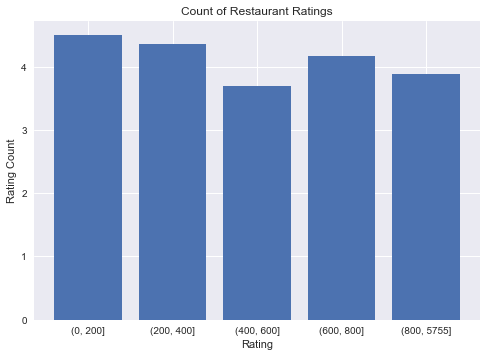

In [21]:
fig, ax = plt.subplots()
#list(rest)
ax.set_title("Count of Restaurant Ratings")
ax.set_xlabel("Rating")
ax.set_ylabel("Rating Count")
ax.bar([str(bine) for bine in resto_binned.index],resto_binned)
#ax.hist(resto_db["rating"])
plt.savefig("Restaurant Ratings")
#ax.set_xticks(bins[:-1])
#ax.bar(list(map(lambda x:str,bins[:-1])),resto_binned)

In [7]:
print(resto_binned.size)

5
